In [1]:
import pandas as pd

In [3]:
data = pd.read_csv(r'C:\Users\hp\Documents\GitHub\Forecast_Treasury_Curve\Dataset\final_feature_library_all_features.csv')

In [4]:
data.head()

,Date,USGG2YR_mean,USGG5YR_mean,USGG10YR_mean,USGG30YR_mean,FEDL01_Index_mean,JYBSS3M_Curncy_mean,EUXOQQC_Curncy_mean,GCFRTSY_Index_mean,USO3SS10_PREB_Curncy_mean,...,NFP_T_Index,CPTICHNG_Index,IPTLMATS_Index,IPEQBUS_Index,IPNDTOTL_Index,ICGDDCGS_Index,IPTLTOTL_Index,PIDSPINX_Index,PCE_DRBL,PCE_NDRB
0,2000-01-31,6.428700,6.563800,6.656050,6.624650,5.557143,NaN,NaN,NaN,NaN,...,131011.0,82.0932,83.2,82.7,102.6,99.8,96.5,10000.311,908.629,1463.658
1,2000-02-29,6.597286,6.653762,6.520095,6.227476,5.744286,NaN,NaN,NaN,NaN,...,131121.0,82.0943,83.3,83.3,103.8,99.5,97.1,10045.889,930.674,1485.436
2,2000-03-31,6.515478,6.491391,6.246957,6.045217,5.871304,NaN,NaN,NaN,NaN,...,131604.0,82.1340,83.8,84.5,103.5,99.2,97.2,10078.563,923.323,1527.538
3,2000-04-30,6.383550,6.250900,5.982150,5.836550,6.009500,NaN,NaN,NaN,NaN,...,131883.0,82.3741,84.2,85.5,104.1,100.5,98.0,10127.630,900.602,1528.217
4,2000-05-31,6.791304,6.674652,6.425348,6.137261,6.277826,NaN,NaN,NaN,NaN,...,132105.0,82.3350,84.6,86.2,104.6,100.1,98.3,10135.728,906.968,1532.024


In [5]:
data['Spread'] = data['USGG10YR_mean'] - data['USGG2YR_mean']

In [6]:
data.head()

,Date,USGG2YR_mean,USGG5YR_mean,USGG10YR_mean,USGG30YR_mean,FEDL01_Index_mean,JYBSS3M_Curncy_mean,EUXOQQC_Curncy_mean,GCFRTSY_Index_mean,USO3SS10_PREB_Curncy_mean,...,CPTICHNG_Index,IPTLMATS_Index,IPEQBUS_Index,IPNDTOTL_Index,ICGDDCGS_Index,IPTLTOTL_Index,PIDSPINX_Index,PCE_DRBL,PCE_NDRB,Spread
0,2000-01-31,6.428700,6.563800,6.656050,6.624650,5.557143,NaN,NaN,NaN,NaN,...,82.0932,83.2,82.7,102.6,99.8,96.5,10000.311,908.629,1463.658,0.227350
1,2000-02-29,6.597286,6.653762,6.520095,6.227476,5.744286,NaN,NaN,NaN,NaN,...,82.0943,83.3,83.3,103.8,99.5,97.1,10045.889,930.674,1485.436,-0.077190
2,2000-03-31,6.515478,6.491391,6.246957,6.045217,5.871304,NaN,NaN,NaN,NaN,...,82.1340,83.8,84.5,103.5,99.2,97.2,10078.563,923.323,1527.538,-0.268522
3,2000-04-30,6.383550,6.250900,5.982150,5.836550,6.009500,NaN,NaN,NaN,NaN,...,82.3741,84.2,85.5,104.1,100.5,98.0,10127.630,900.602,1528.217,-0.401400
4,2000-05-31,6.791304,6.674652,6.425348,6.137261,6.277826,NaN,NaN,NaN,NaN,...,82.3350,84.6,86.2,104.6,100.1,98.3,10135.728,906.968,1532.024,-0.365957


### Visualization of Spread (10yr vs 2yr) over the past 5 years

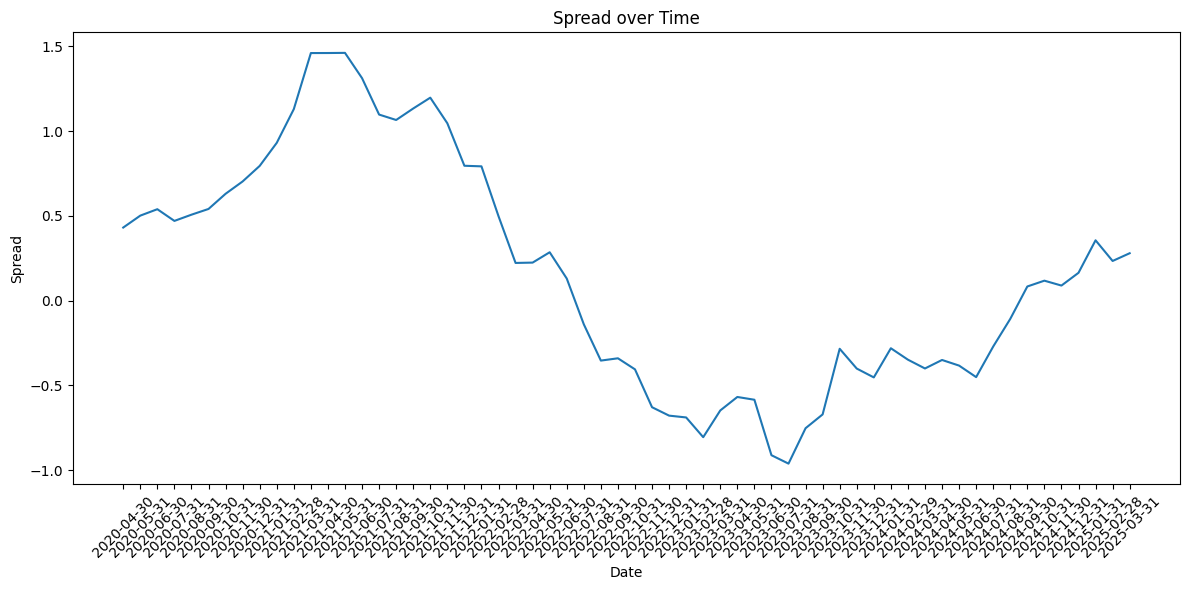

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-60:], data['Spread'][-60:])
plt.xlabel('Date')
plt.ylabel('Spread')
plt.title('Spread over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Stationarity tests

In [14]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
adf_result = adfuller(data['Spread'].dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# KPSS Test
kpss_result = kpss(data['Spread'].dropna(), regression='c')
print('KPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])

ADF Statistic: -3.1938686852267044
p-value: 0.020342338225597823
KPSS Statistic: 0.6687504156654177
p-value: 0.016386325848598386


Both KPSS and ADF stationarity tests have different null-hypothesis.(KPSS assumes that data is stationary, and ADF assumes data is non-stationary) Hence, it is useful to perform both the tests to get robust results. However, if the results are contradictory, like in the case above, the tests are inconclusive. Maybe, it has some structural breaks.   